## Setup

In [1]:
%matplotlib inline

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from sklearn.decomposition import PCA


In [2]:
data_dir = 'D:/bme/test_data2/'
logs_dir = 'D:/bme/labels/validation/'

In [3]:
def load_labels():
    labels_df = pd.DataFrame()

    for filename in os.listdir(logs_dir):
        if filename.endswith(".txt"): 
            file_path = os.path.join(logs_dir, filename)
            
            current_df = pd.read_csv(file_path, skiprows=1, header=None, names=['t', 'x', 'y', 'd'])
            current_df['date'] = filename[6:-4]
            
            labels_df = labels_df.append(current_df, ignore_index=True)
    labels_df['t'] = pd.to_numeric(labels_df['t'], errors='coerce')
    labels_df['x'] = pd.to_numeric(labels_df['x'], errors='coerce')
    labels_df['y'] = pd.to_numeric(labels_df['y'], errors='coerce')
    labels_df['d'] = pd.to_numeric(labels_df['d'], errors='coerce')

    return labels_df


In [4]:
def load_data_from_prefix(prefix):
    logs_df = pd.DataFrame()
    for filename in os.listdir(data_dir):
        if filename.endswith(".bag") and filename.startswith(prefix): 
            file_path = os.path.join(data_dir, filename)

            column_names = [i for i in range(283)]


            current_df = pd.read_csv(file_path, skiprows=1, header=None, sep='|', names=column_names)
            
            s = (filename[:-4].split('_'))
            current_df['date'] = s[2] + '_' + s[3]
            current_df['param'] = s[1]

            logs_df = logs_df.append(current_df, ignore_index=True)
                    

    return logs_df

In [5]:
labels_df = load_labels()

raw_df = load_data_from_prefix('A06_full_2024')

C:\Users\finno\AppData\Local\Temp\ipykernel_5664\844476130.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  labels_df = labels_df.append(current_df, ignore_index=True)
C:\Users\finno\AppData\Local\Temp\ipykernel_5664\844476130.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  labels_df = labels_df.append(current_df, ignore_index=True)
C:\Users\finno\AppData\Local\Temp\ipykernel_5664\844476130.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  labels_df = labels_df.append(current_df, ignore_index=True)
C:\Users\finno\AppData\Local\Temp\ipykernel_5664\844476130.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  labels_df = labe

## Dimension Reduction


In [6]:
# Define column ranges

x_ranges = [
    np.arange(12, 21),
    np.arange(21, 30),
    np.arange(30, 39),
    np.arange(39, 48),
    np.arange(48, 57),
    np.arange(57, 66),
    np.arange(66, 75),
    np.arange(75, 84),
    np.arange(84, 93),
    np.arange(93, 102)
]
q_ranges = [
    np.arange(103, 112),
    np.arange(112, 121),
    np.arange(121, 130),
    np.arange(130, 139),
    np.arange(139, 148),
    np.arange(148, 157),
    np.arange(157, 166),
    np.arange(166, 175),
    np.arange(175, 184),
    np.arange(184, 193),
    np.arange(193, 202),
    np.arange(202, 211),
    np.arange(211, 220),
    np.arange(220, 229),
    np.arange(229, 238),
    np.arange(238, 247),
    np.arange(247, 256),
    np.arange(256, 265),
    np.arange(265, 274),
    np.arange(274, 283)
]

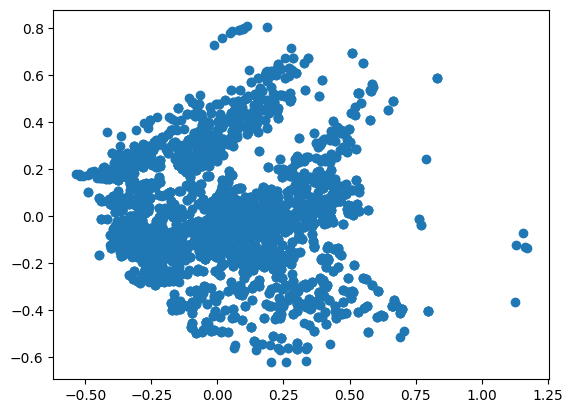

In [7]:
# Lets reduce the first element of the queue

q1_df = raw_df.iloc[:, q_ranges[0]].dropna()

pca = PCA(n_components=2)
reduced_features = pca.fit_transform(q1_df)
q1_df['PC1'] = reduced_features[:, 0]
q1_df['PC2'] = reduced_features[:, 1]

plt.scatter(q1_df['PC1'], q1_df['PC2'])


In [8]:
# Make into a function

def get_dim_reduction(raw_df, column_range):

    q1_df = raw_df.iloc[:, column_range]

    pca = PCA(n_components=2)
    reduced_features = pca.fit_transform(q1_df)
    q1_df['PC1'] = reduced_features[:, 0]
    q1_df['PC2'] = reduced_features[:, 1]

    return q1_df[['PC1', 'PC2']], pca

def get_dim_reduction_from_pca(raw_df, column_range, pca):
    if raw_df.shape[0] == 0:
        return None
    
    q1_df = raw_df.iloc[:, column_range]

    reduced_features = pca.transform(q1_df)
    q1_df['PC1'] = reduced_features[:, 0]
    q1_df['PC2'] = reduced_features[:, 1]

    return q1_df[['PC1', 'PC2']]

In [9]:
# Build out larger scale dimred dfs

__, pca = get_dim_reduction(raw_df.dropna(subset=(x_ranges[0])), x_ranges[0])

x_df_list = [
    get_dim_reduction_from_pca(raw_df.dropna(subset=x_ranges[i]), x_ranges[i], pca) for i in range(10)
]

q_df_list = [
    get_dim_reduction_from_pca(raw_df.dropna(subset=q_ranges[i]), q_ranges[i], pca) for i in range(20)
]

C:\Users\finno\AppData\Local\Temp\ipykernel_5664\2810452822.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q1_df['PC1'] = reduced_features[:, 0]
C:\Users\finno\AppData\Local\Temp\ipykernel_5664\2810452822.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q1_df['PC2'] = reduced_features[:, 1]
C:\Users\finno\AppData\Local\Temp\ipykernel_5664\2810452822.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

In [30]:
# Run a full animation 

import IPython.display as display
import time

freq = 20 # Hz

indices = q_df_list[0].index

for aa, idx in enumerate(indices[1400:]):
    tic = time.time()
    display.clear_output(wait=True)

    for i in range(len(q_df_list)):
        q_df = q_df_list[i]

        if q_df is not None:
            if idx in q_df.index:
                plt.scatter(q_df.iloc[idx]['PC1'], q_df.iloc[idx]['PC2'], color='red', label='Patient Queue')

        if i == 0:
            x_df = x_df_list[i]

            if x_df is not None:
                if idx in x_df.index:
                    plt.scatter(x_df.iloc[idx]['PC1'], x_df.iloc[idx]['PC2'], color='b', label='Query Points')

    for i in range(len(x_df_list)):
        x_df = x_df_list[i]

        if x_df is not None:
            if idx in x_df.index:
                plt.scatter(x_df.iloc[idx]['PC1'], x_df.iloc[idx]['PC2'], color='b', label='Query Points')

    plt.xlim([-0.7, 1.3])
    plt.ylim([-0.7, 1.3])
    plt.legend(['Patient Representation', 'Query Points'])
    plt.xlabel('Principle Component 1')
    plt.ylabel('Principle Component 2')
    plt.title(f"Reduced Feature Space ({raw_df.loc[idx, 'date']})")
    plt.show()

    toc = time.time()



    #time.sleep((1/freq) - (toc - tic))

KeyboardInterrupt: 

## Feature Importance

,PC1,PC2
79,-0.583888,0.186426
80,-0.594550,0.188190
81,-0.528084,0.081971
82,-0.580115,0.177828
83,-0.565768,0.182116
...,...,...
6731,-0.081327,-0.038026
6732,-0.081832,-0.021887
6733,-0.104562,-0.028783
6734,-0.117258,-0.037237


In [42]:
from sklearn.feature_selection import VarianceThreshold

df = raw_df.iloc[:, x_ranges[0]].dropna(subset=(x_ranges[0]))

selector = VarianceThreshold()
selector.fit_transform(df)
print("Feature variances:", selector.variances_)

Feature variances: [0.05586579 0.02660519 0.01647065 0.02998926 0.00028793 0.00770388
 0.00674309 0.00640261 0.03825846]


Text(0.5, 1.0, 'Feature Variance Scores')

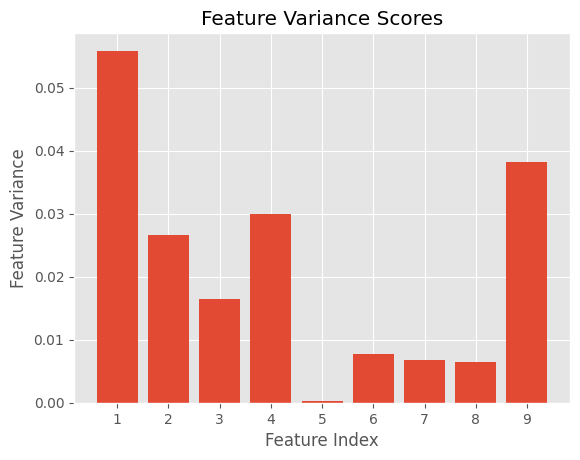

In [52]:
plt.style.use('ggplot')

plt.bar([str(i+1) for i in range(9)], selector.variances_)
plt.xlabel('Feature Index')
plt.ylabel('Feature Variance')
plt.title('Feature Variance Scores')

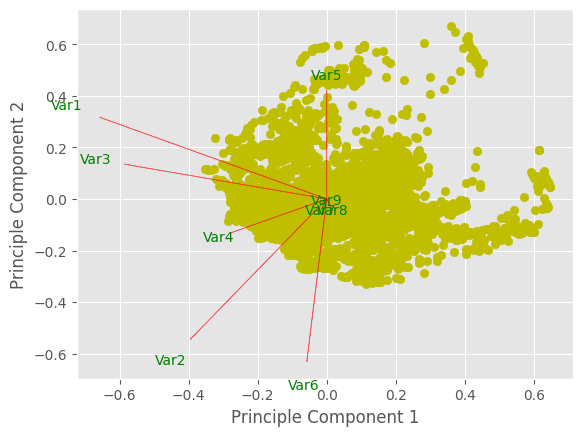

In [49]:
plt.style.use('ggplot')

def plot_biplot(score, coeff, labels=None):
    xs = score[:, 0]
    ys = score[:, 1]
    n = coeff.shape[0]
    scalex = 1.0 / (xs.max() - xs.min())
    scaley = 1.0 / (ys.max() - ys.min())

    plt.scatter(xs * scalex, ys * scaley, c='y')
    for i in range(n):
        plt.arrow(0, 0, coeff[i, 0], coeff[i, 1], color='r', alpha=0.5)
        if labels is None:
            plt.text(coeff[i, 0] * 1.15, coeff[i, 1] * 1.15, f"Var{i+1}", color='g', ha='center', va='center')
        else:
            plt.text(coeff[i, 0] * 1.15, coeff[i, 1] * 1.15, labels[i], color='g', ha='center', va='center')

    plt.xlabel('Principle Component 1')
    plt.ylabel('Principle Component 2')
    #plt.title('Biplot of Patient Features')


pca = PCA()
X_new = pca.fit_transform(df)

plot_biplot(X_new, pca.components_)

In [53]:
explained_variance = pca.explained_variance_ratio_
print("Explained variance ratio:", explained_variance)

Explained variance ratio: [4.80471018e-01 2.83432326e-01 1.20508349e-01 8.41188178e-02
 1.79537445e-02 8.68832545e-03 3.43832994e-03 1.23821532e-03
 1.50874508e-04]


Text(0.5, 1.0, 'Explained Variance Ratio in PCA')

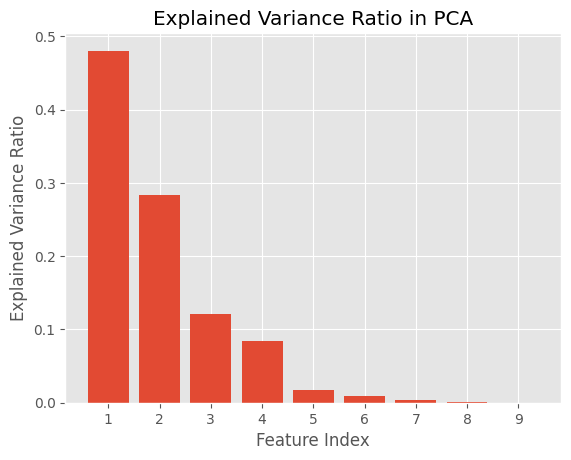

In [56]:
plt.style.use('ggplot')

plt.bar([str(i+1) for i in range(9)], explained_variance)
plt.xlabel('Feature Index')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio in PCA')
